PyImageJ Tutorial
===

This notebook covers how to use ImageJ as a library from Python. A major advantage of this approach is the ability to combine ImageJ with other tools available from the Python software ecosystem, including NumPy, SciPy, scikit-image, CellProfiler, OpenCV, ITK and more.

This notebook assumes familiarity with the ImageJ API. Detailed tutorials in that regard can be found in the other notebooks.

## 2 A simple example: `ij.py.show()`

ImageJ can display numpy images using `ij.py.show`. Let's demonstrate using `scikit-image` to grab a sample:

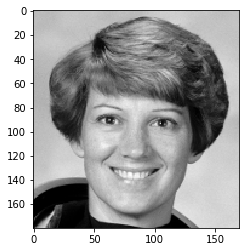

In [3]:
import skimage
import numpy as np
img = skimage.data.astronaut()
img = np.mean(img[10:190,140:310], axis=2)
ij.py.show(img, cmap = 'gray')